In [1]:
import sys
import os

# Get the path to the current working directory
current_dir = os.getcwd()

# Get the path to the parent directory (containing both A.py and 'B' directory)
parent_dir = os.path.dirname(current_dir)

london_data_dir = os.path.join(parent_dir, 'Data/London_dataset/preprocessed')
results_dir = os.path.join(current_dir, 'results')
# Append the parent directory to the module search path
sys.path.append(parent_dir)

import pickle 
from sklearn.tree import DecisionTreeRegressor, export_text
from scengen.generators import PredClusGenerator, SampleGenerator, RandomGenerator
from sklearn import tree
import pandas as pd
import graphviz

with open(os.path.join(results_dir,"notebooks/results/ThesisResults/PCT_D8_M850_london_dataset_with_buffer_feb_0.pkl"), 'rb') as file:
    loaded_model = pickle.load(file)
time_df = pd.read_pickle(os.path.join(results_dir,"DataToGenVisuals/t_buffer_feb.pkl"))
attributes_df = pd.read_pickle(os.path.join(results_dir,"DataToGenVisuals/a_buffer_feb.pkl"))
vistree = loaded_model.to_visualization_tree(attributes_df, time_df)


In [2]:
import pandas as pd

# Assuming 'X_train' is your training DataFrame and 'model' is your trained DecisionTreeRegressor
feature_names = attributes_df.columns
importances = loaded_model.tree.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names, importances))

# Alternatively, create a sorted list of tuples for better visualization
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# You can print or view the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: yearly_consumption, Importance: 0.7260898915909706
Feature: maxTempC, Importance: 0.08706474738665915
Feature: average_weekday, Importance: 0.03581610757730818
Feature: average, Importance: 0.028561025264873207
Feature: evening_total_consumption, Importance: 0.015609031763969541
Feature: morning_total_consumption, Importance: 0.014860342848857887
Feature: night_total_consumption, Importance: 0.01459370498304122
Feature: evening_peak_weekend, Importance: 0.008585458729209459
Feature: night_peak, Importance: 0.008468417394828042
Feature: avgTempC, Importance: 0.007460582013807201
Feature: dayOfYear, Importance: 0.0065085684247129134
Feature: night_total_consumption_weekday, Importance: 0.006189902557658165
Feature: total_consumption_buffer, Importance: 0.005740658652409584
Feature: std, Importance: 0.0038351275465144273
Feature: morning_total_consumption_weekday, Importance: 0.0030726179809066455
Feature: morning_total_consumption_weekend, Importance: 0.002533258930453409
Featur

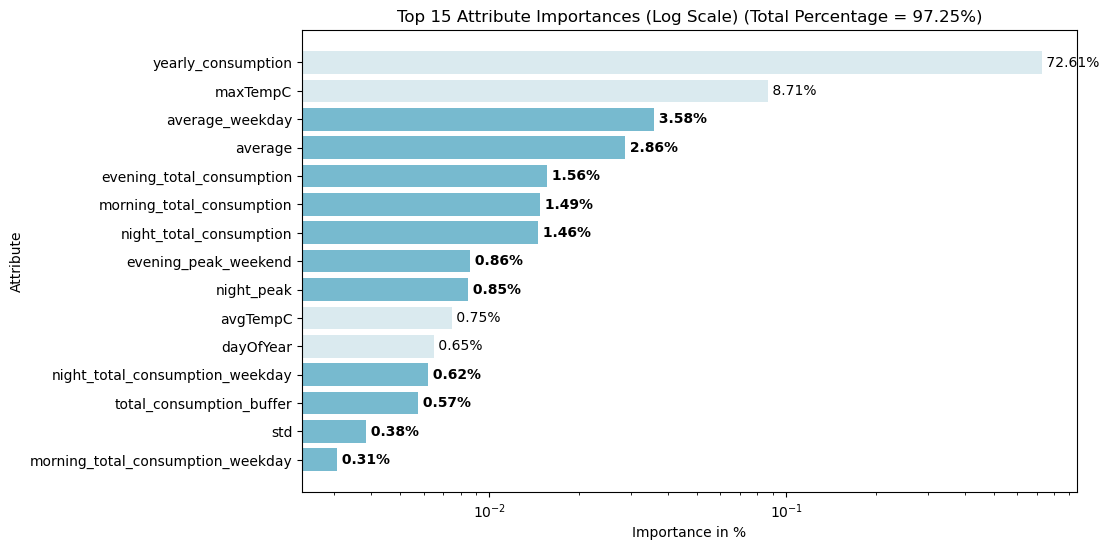

Total importance percentage covered by top 15 features: 97.25%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_color = '#1D8DB0'
palette = sns.light_palette(base_color, n_colors=15)

# Assuming 'X_train' is your training DataFrame and 'model' is your trained DecisionTreeRegressor
feature_names = attributes_df.columns
importances = loaded_model.tree.feature_importances_

# Create a sorted list of tuples for better visualization
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Extract top 15 features and their importances
top_features = [x[0] for x in sorted_feature_importances[:15]]
top_importances = [x[1] for x in sorted_feature_importances[:15]]

total_importance_percentage = sum(top_importances) * 100
# List of special features

# Plotting
plt.figure(figsize=(10, 6))
for feature, importance in zip(top_features, top_importances):
    color = palette[3]
    weight = 'normal'
    if feature in special_attributes:
        color = palette[14]
        weight = 'bold'
    plt.barh(feature, importance, color=color, alpha=0.6)
    plt.text(importance, feature, f' {importance:.2%}', ha='left', va='center', weight=weight)
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.xlabel('Importance in %')
plt.ylabel('Attribute')
plt.title(f'Top 15 Attribute Importances (Log Scale) (Total Percentage = {total_importance_percentage:.2f}%)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.savefig('notebooks/pictures/featureimportancesLondon.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()
print(f'Total importance percentage covered by top 15 features: {total_importance_percentage:.2f}%')



In [4]:
attributes_df.shape

(648824, 137)

In [2]:
#vistree.plot_tree(figsize = (150,140))

In [5]:
from data_preprocessing.get_buffer_attributes import BufferAttributesCalculator
calculator = BufferAttributesCalculator(None)
column_names = list(calculator.column_functions.keys())
columns_weekday = [f"{column}_weekday" for column in column_names]
columns_weekend = [f"{column}_weekend" for column in column_names]

In [14]:
for colname in column_names:
    print(colname)

average
evening_peak
evening_total_consumption
highest
kurtosis
lunch_peak
lunch_total_consumption
median
min
morning_peak
morning_total_consumption
night_peak
night_total_consumption
skewness
std
total_consumption_buffer


In [6]:
import pygraphviz as pgv
from io import StringIO

# DOT data stored in a variable
dot_data = tree.export_graphviz(loaded_model.tree, out_file=None, feature_names=attributes_df.columns.tolist(), filled=True, rounded=True)

# Convert DOT data to a file-like object
dot_file_object = StringIO(dot_data)

# Load DOT data
graph = pgv.AGraph(string=dot_file_object.read())

# List of special attributes
special_attributes = column_names + columns_weekday + columns_weekend

# Function to check if a node label contains a special attribute
def has_special_attribute(label):
    return any(attr in label for attr in special_attributes)

# Iterate through nodes and color nodes with special attributes
used_special_attributes = []
for node in graph.nodes():
    if has_special_attribute(node.attr['label']):
        node.attr['fillcolor'] = 'blue'
        special_attributes.append(node.attr['label'])

# Save the modified DOT file
output_dot_data = graph.to_string()
# Now you can use the modified DOT data as needed



In [7]:


# Visualize the decision tree using Graphviz
graph = graphviz.Source(output_dot_data)
graph.render("decision_tree", format="pdf", cleanup=True, view=True)
graph.view("decision_tree")   

'decision_tree.pdf'